In [42]:
import math
import os

import numpy as np
import matplotlib.pyplot as plt
import pybamm

import utils as ssb_utils

from scipy import special, stats

In [43]:
options = {'operating mode': 'current', 'dimensionality': 0, 'surface form': 'false', 'convection': 'none',
           'side reactions': [], 'interfacial surface area': 'constant', 'current collector': 'uniform',
           'particle': 'Fickian diffusion', 'particle shape': 'spherical', 'electrolyte conductivity': 'default',
           'thermal': 'isothermal', 'cell geometry': 'arbitrary', 'external submodels': [], 'SEI': 'none',
           'lithium plating': 'none', 'SEI porosity change': 'false', 'lithium plating porosity change': 'false',
           'loss of active material': 'none', 'working electrode': 'none', 'particle cracking': 'none',
           'total interfacial current density as a state': 'false', 'SEI film resistance': 'none'
          }
plots = ["Total current density", "Exchange current density", "Electrode current density", "Electrolyte current density",
    "Terminal voltage [V]", "Negative electrode potential [V]", "Positive electrode potential [V]"]

In [ ]:
chemistry = pybamm.parameter_sets.Chen2020
parameters = pybamm.ParameterValues(chemistry=chemistry)
model = pybamm.lithium_ion.DFN()
sim = pybamm.Simulation(model=model, parameter_values=parameters)
sim.solve([0, 3600])

In [ ]:
solution = sim.solution

In [35]:
solution.keys()

Widget Javascript not detected.  It may not be installed or enabled properly.


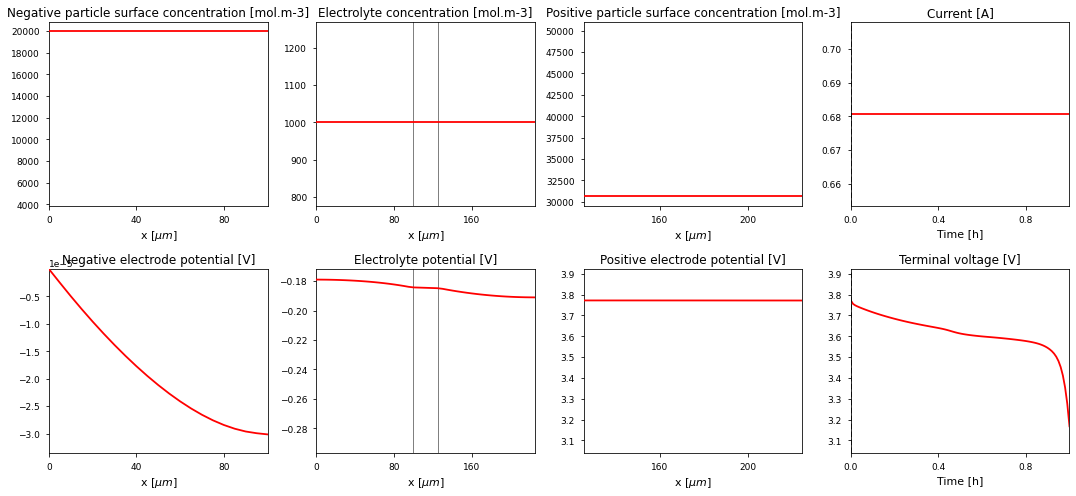

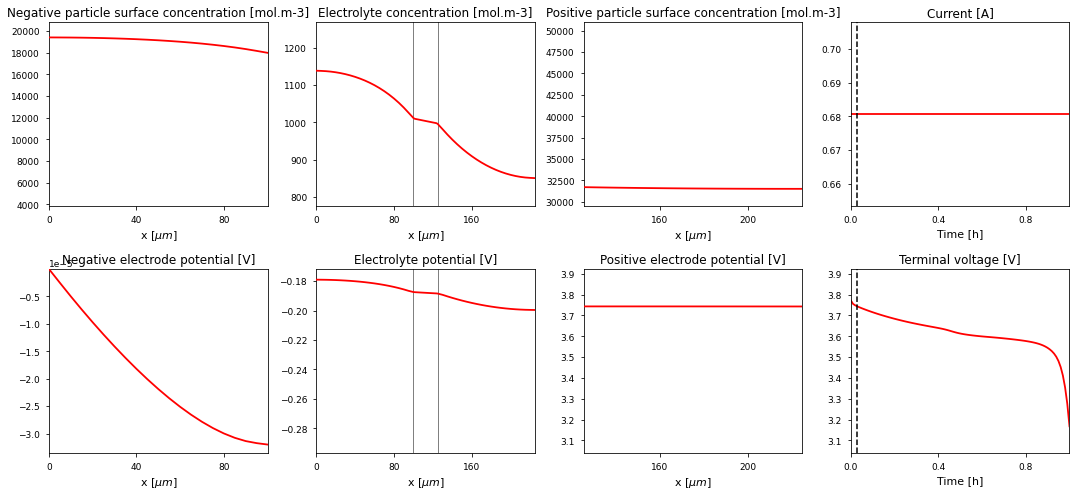

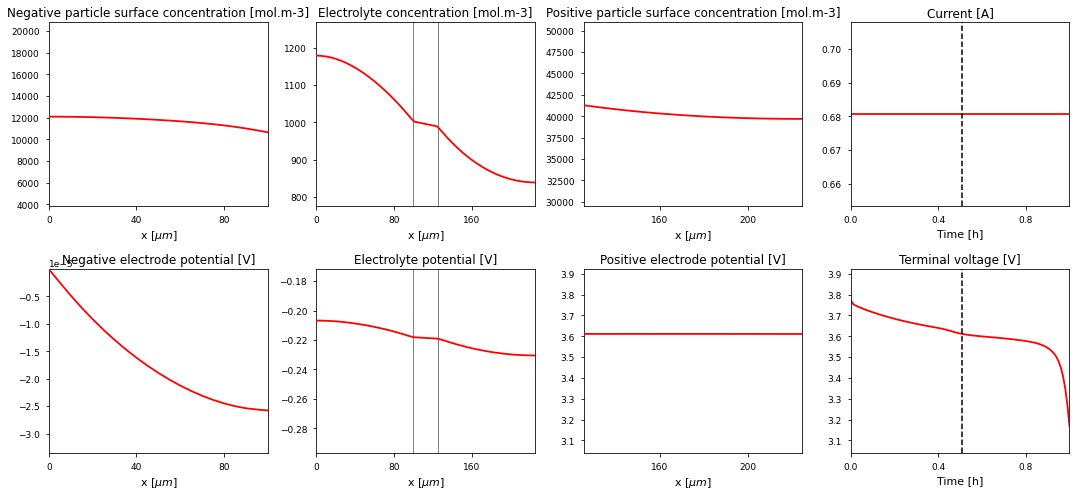

In [39]:
sim.plot()

# Model charging (with examples from Minnmann et al, 2021)

# Capacity change with current density

$q_{mat} = 150 e^{-\phi j}$

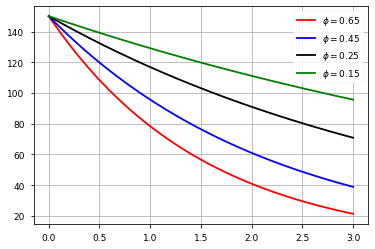

In [7]:
j = np.linspace(0.0, 3.0, 100000)
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.grid()
line1, = ax1.plot(j, 150 * np.exp(-0.65 * j))
line2, = ax1.plot(j, 150 * np.exp(-0.45 * j))
line3, = ax1.plot(j, 150 * np.exp(-0.25 * j))
line4, = ax1.plot(j, 150 * np.exp(-0.15 * j))
ax1.legend([line1, line2, line3, line4], ['$\phi = 0.65$', '$\phi = 0.45$', '$\phi = 0.25$', '$\phi = 0.15$'])

$q_{com} = 120 e^{-\phi j}$

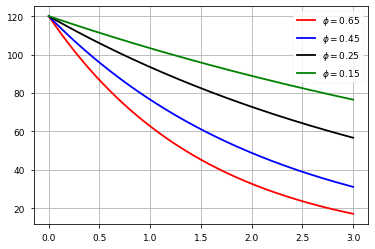

In [8]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(1, 1, 1)
ax2.grid()
line1, = ax2.plot(j, 120 * np.exp(-0.65 * j))
line2, = ax2.plot(j, 120 * np.exp(-0.45 * j))
line3, = ax2.plot(j, 120 * np.exp(-0.25 * j))
line4, = ax2.plot(j, 120 * np.exp(-0.15 * j))
ax2.legend([line1, line2, line3, line4], ['$\phi = 0.65$', '$\phi = 0.45$', '$\phi = 0.25$', '$\phi = 0.15$'])

## Capacity with CAM vol %

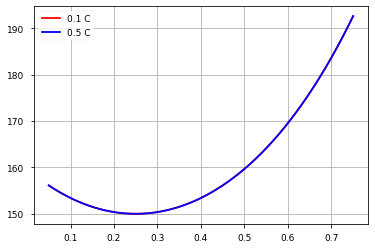

In [8]:
# phi0 = 0.25
# phi = np.linspace(0.05, 0.75, 100000)
# fig3 = plt.figure()
# ax3 = fig3.add_subplot(1, 1, 1)
# ax3.grid()
# line1, = ax3.plot(phi, 150 * np.exp((phi - phi0) ** 2))
# line2, = ax3.plot(phi, 150 * np.exp((phi - phi0) ** 2))
# ax3.legend([line1, line2], ['0.1 C', '0.5 C'])

## Lithium diffusing out of spherical cathode particles
Fraction of lithium that has left the CAM particle relative to what would leave at infinite time is given by
$$\\\\$$
$
\frac{M_t}{M_{\infty}} = \frac{6}{\pi^2}\sum_{n=1}^{\infty}\frac{1}{n^2}exp\left({-\frac{n^2\pi^2 Dt}{R^2}}\right)
$

In [23]:
# Hines and Maddox EQN4-86, but here we use first 100 terms
n = np.arange(100) + 1
D_eff = 4E-15 # [m2.s-1]
R_p = 5E-6 # [m]
rho = 3262  # [kg.m-3]

def rel_sorp(t):
    return ((6/(np.pi**2))*np.sum((1/(n**2))*np.exp(-(((n*np.pi)**2)*D_eff*t)/(R_p**2)), axis=0))

In [24]:
t_arr = np.linspace(0, 3600, 100000)
rel_sorption = [rel_sorp(t) for t in t_arr]

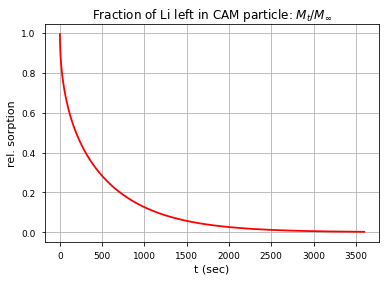

In [26]:
plt.plot(t_arr, rel_sorption)
plt.grid()
plt.title("Fraction of Li left in CAM particle: $M_t/M_{\infty}$")
plt.ylabel("rel. sorption")
plt.xlabel("t (sec)")
plt.show()